# Tugas Besar IF2220 Probabilitas dan Statistika
# Penarikan Kesimpulan dan Pengujian Hipotesis
---
---


### PREREQUISITE
---

Sebelum melakukan pengerjaan soal-soal tugas besar, dibutuhkan setup sebagai prerequisite atau tahap awal pengerjaan. Prerequisite dilakukan dengan melakukan import library dan mengubah file CSV menjadi sebuah dataframe yang nantinya akan digunakan.

In [1]:
# Melakukan import library yang diperlukan untuk melakukan tugas
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# Membaca file CSV dan menambahkan header pada dataframe
column = ["Fixed Acidity", "Volatile Acidity", "Citric Acid", "Residual Sugar", "Chlorides", "Free Sulfur Dioxide", "Total Sulfur Dioxide", "Density", "pH", "Sulphates", "Alcohol", "Quality"]
data = pd.read_csv("anggur.csv", skiprows=1, names=column)

### SOAL 1

---
Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR, skewness dan kurtosis. Boleh juga ditambahkan deskripsi lain.

Penulisan deskripsi statistik kolom dilakukan dengan menggunakan berbagai fungsi yang disediakan oleh library pandas seperti mean(), std(), quantile(), skew(), dan lain-lain. 

Kode berikut memberikan seluruh deskripsi statistik setiap kolom kecuali statistik modus.

In [45]:
# Deskripsi statistik seluruh kolom kecuali statistik modus
pd.concat([pd.DataFrame(data.count(), columns = ["Count"]).T,
           pd.DataFrame(data.mean(), columns = ["Mean"]).T,
           pd.DataFrame(data.median(), columns = ["Median"]).T,
           pd.DataFrame(data.std(), columns = ["Standar Deviation"]).T,
           pd.DataFrame(data.var(), columns = ["Variance"]).T,
           pd.DataFrame(data.max() - data.min(), columns = ["Range"]).T,
           pd.DataFrame(data.min(), columns = ["Minimum"]).T,
           pd.DataFrame(data.max(), columns = ["Maximum"]).T,
           data.describe().loc[["25%", "50%", "75%"]],
           pd.DataFrame(data.quantile(0.75) - data.quantile(0.25), columns = ["IQR"]).T,
           pd.DataFrame(data.skew(), columns = ["Skewness"]).T,
           pd.DataFrame(data.kurtosis(), columns = ["Kurtosis"]).T])

,Fixed Acidity,Volatile Acidity,Citric Acid,Residual Sugar,Chlorides,Free Sulfur Dioxide,Total Sulfur Dioxide,Density,pH,Sulphates,Alcohol,Quality
Count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
Mean,7.152530,0.520839,0.270517,2.567104,0.081195,14.907679,40.290150,0.995925,3.303610,0.598390,10.592280,7.958000
Median,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000
Standar Deviation,1.201598,0.095848,0.049098,0.987915,0.020111,4.888100,9.965767,0.002020,0.104875,0.100819,1.510706,0.902802
Variance,1.443837,0.009187,0.002411,0.975977,0.000404,23.893519,99.316519,0.000004,0.010999,0.010164,2.282233,0.815051
Range,8.170000,0.665200,0.292900,5.518200,0.125635,27.267847,66.810000,0.013800,0.740000,0.670000,8.990000,5.000000
Minimum,3.320000,0.139900,0.116700,0.032555,0.015122,0.194679,3.150000,0.988800,2.970000,0.290000,6.030000,5.000000
Maximum,11.490000,0.805100,0.409600,5.550755,0.140758,27.462525,69.960000,1.002600,3.710000,0.960000,15.020000,10.000000
25%,6.377500,0.456100,0.237800,1.896330,0.066574,11.426717,33.785000,0.994600,3.230000,0.530000,9.560000,7.000000
50%,7.150000,0.524850,0.272200,2.519430,0.082167,14.860346,40.190000,0.996000,3.300000,0.595000,10.610000,8.000000


Terkhusus untuk deskripsi statistik modus, diperlukan pengecekan tambahan terhadap data. Hal ini dapat terjadi karena dua nilai data yang berbeda memiliki kemungkinan untuk menjadi modus akibat memiliki banyak kemunculan yang sama dan merupakan banyak kemunculan tertinggi. 

Kode berikut memberikan seluruh nilai modus pada suatu kolom.

In [47]:
# Deskripsi statistik modus seluruh kolom
print("Statistik Modus: ")
for column in data:
    modus = data[column].mode()

    print(column, end = "")
    for i in range(0, 25 - len(column)):
        print(" ", end = "")

    if (len(modus) != data.shape[0]):
        for j in range (len(modus)):
            if j != len(modus) - 1:
                print(modus[j], end = ", ")
            else :
                print(modus[j])
    else :
        print("Data unik, semua value adalah modus")

Statistik Modus: 
Fixed Acidity            6.54
Volatile Acidity         0.5546
Citric Acid              0.3019
Residual Sugar           Data unik, semua value adalah modus
Chlorides                Data unik, semua value adalah modus
Free Sulfur Dioxide      Data unik, semua value adalah modus
Total Sulfur Dioxide     35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51
Density                  0.9959, 0.9961, 0.9965, 0.997
pH                       3.34
Sulphates                0.59
Alcohol                  9.86, 10.31
Quality                  8


### SOAL 2
---

Membuat visualisasi plot distribusi, dalam bentuk histogram dan boxplot untuk setiap kolom numerik. Berikan uraian penjelasan kondisi setiap kolom berdasarkan kedua plot tersebut.

Visualisasi setiap kolom menjadi histogram dan boxplot dilakukan dengan memanfaatkan library matplotlib.         
Kode dibawah mendefinisikan fungsi yang dibutuhkan untuk memvisualisasikan kolom menjadi histogram dan boxplot.

In [135]:
# Fungsi untuk menghasilkan visualisasi plot distribusi setiap kolom dalam bentuk histogram dan boxplot
def vizualizePlot(column):
    fig, axes = plt.subplots(1, 2, figsize = (14, 4))
    fig.suptitle(column + " Data Visualization", weight = 'bold')

    data[column].plot(kind = 'hist', bins = 50, rwidth = 0.85, ax = axes[0])
    axes[0].set_title(column + " Histogram")
    axes[0].set_xlabel("Value")

    data.boxplot(column = column, ax = axes[1])
    axes[1].set_ylabel("Value")
    axes[1].set_title(column + " Boxplot")

Visualisasi beserta penjelasannya dibagi menjadi beberapa bagian berdasarkan kolom. 

#### Bagian 1 : Kolom Fixed Acidity

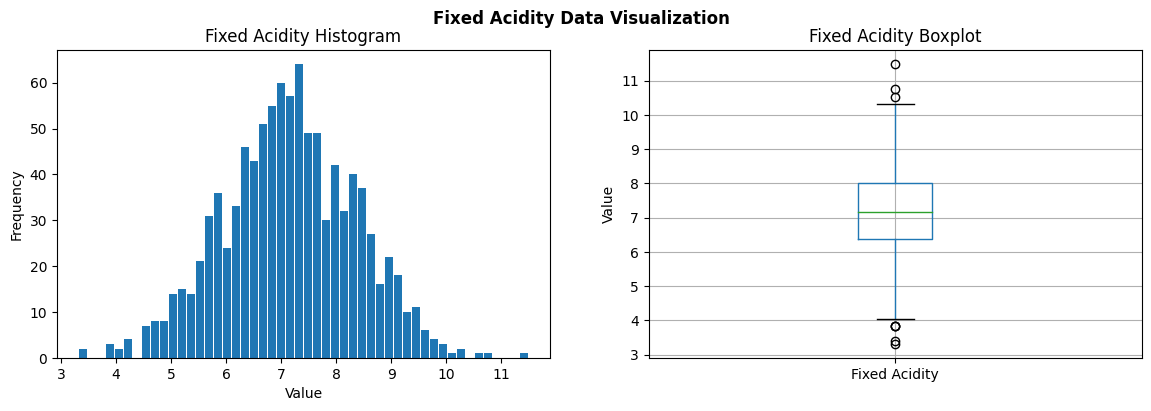

In [136]:
# Visualisasi Kolom Fixed Acidity
vizualizePlot("Fixed Acidity")

#### Bagian 2 : Kolom Volatile Acidity

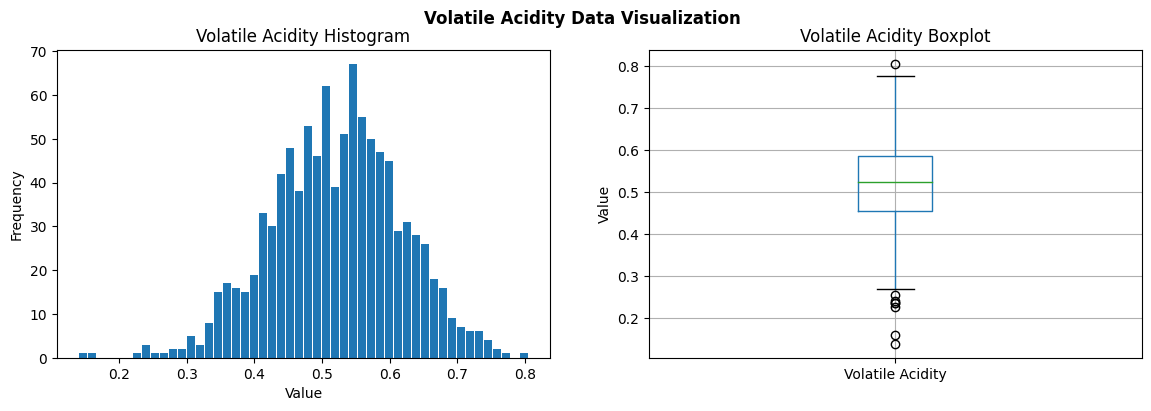

In [137]:
# Visualisasi Kolom Volatile Acidity
vizualizePlot("Volatile Acidity")

#### Bagian 3 : Kolom Citric Acid

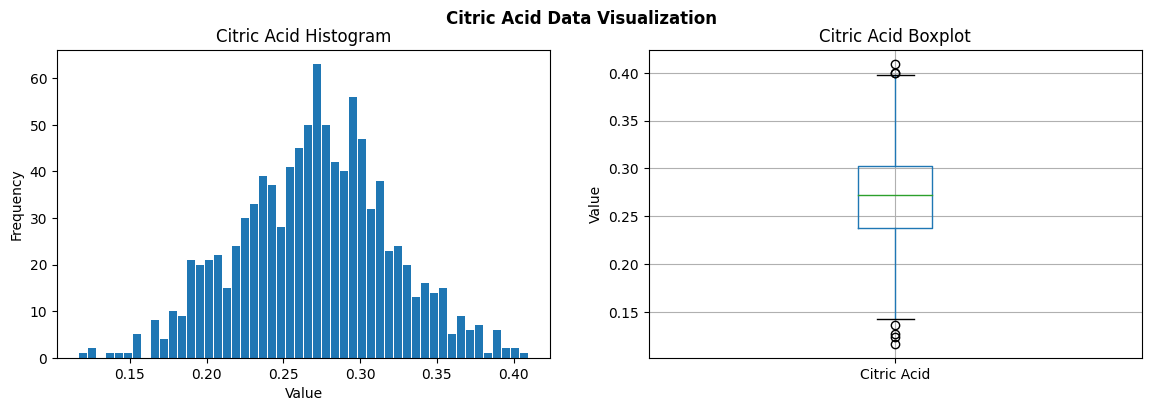

In [138]:
# Visualisasi Kolom Citric Acid
vizualizePlot("Citric Acid")

#### Bagian 4 : Kolom Residual Sugar

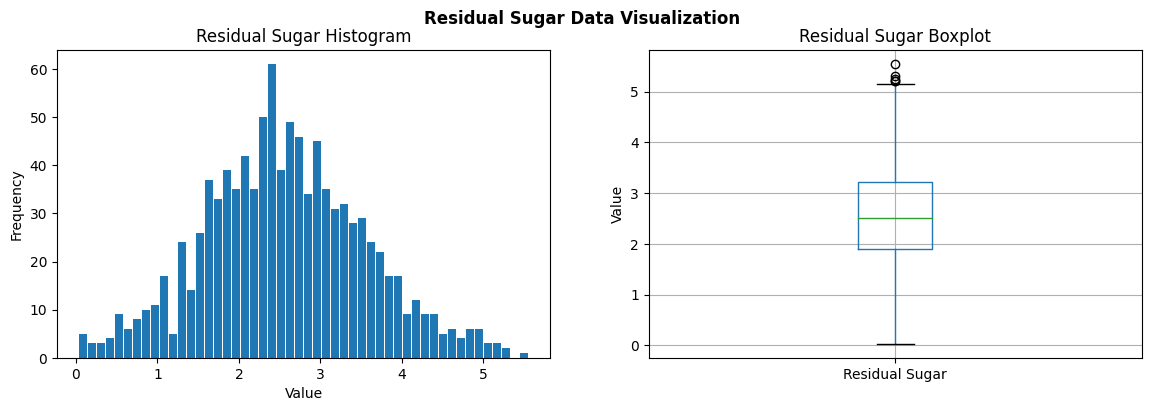

In [140]:
# Visualisasi Kolom Residual Sugar
vizualizePlot("Residual Sugar")

#### Bagian 5 : Kolom Chlorides

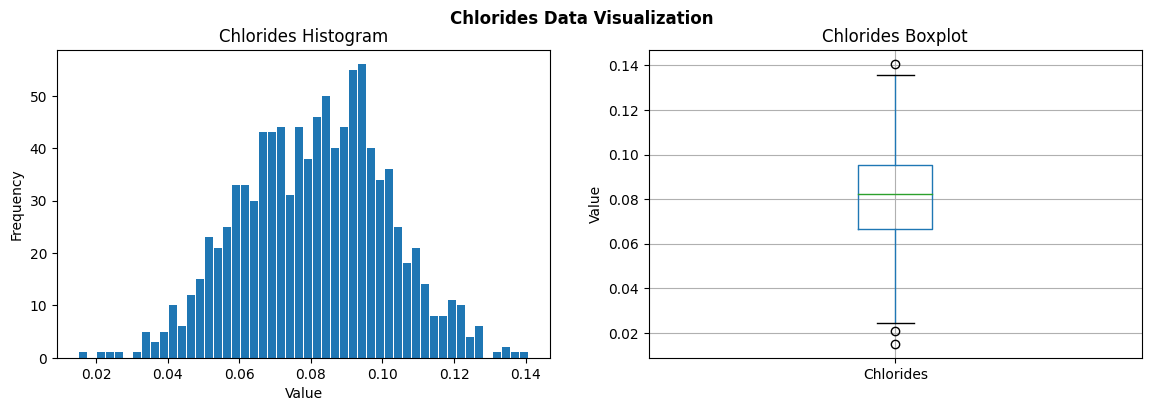

In [141]:
# Visualisasi Kolom Chlorides
vizualizePlot("Chlorides")

#### Bagian 6 : Kolom Free Sulfur Dioxide

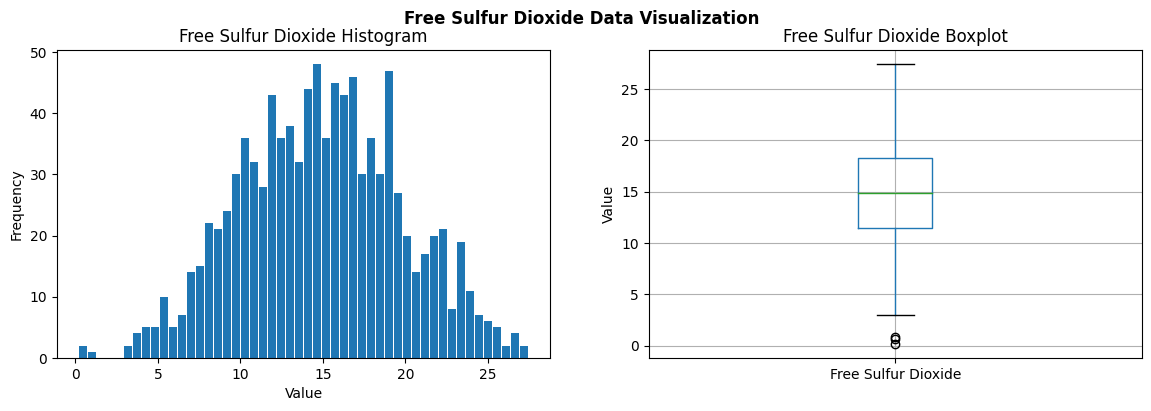

In [142]:
# Visualisasi Kolom Free Sulfur Dioxide
vizualizePlot("Free Sulfur Dioxide")

#### Bagian 7 : Kolom Total Sulfur Dioxide

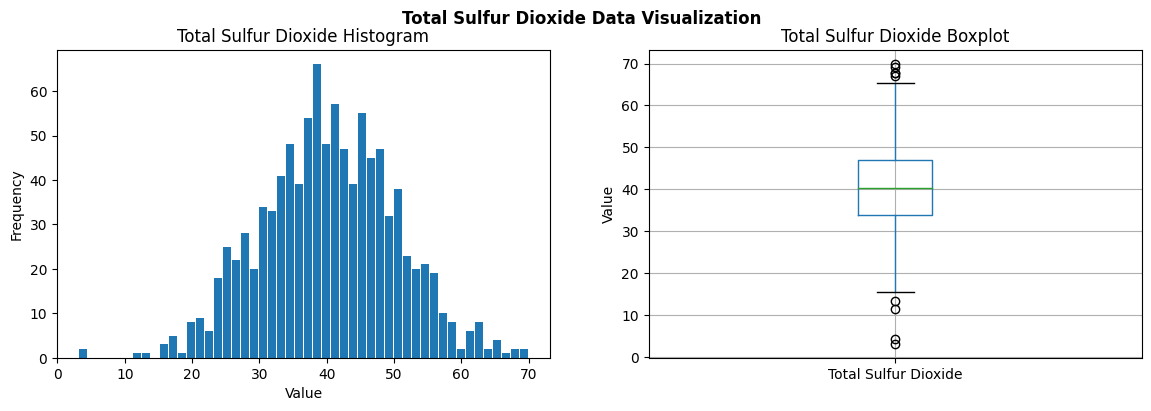

In [143]:
# Visualisasi Kolom Total Sulfur Dioxide
vizualizePlot("Total Sulfur Dioxide")

#### Bagian 8 : Kolom Density

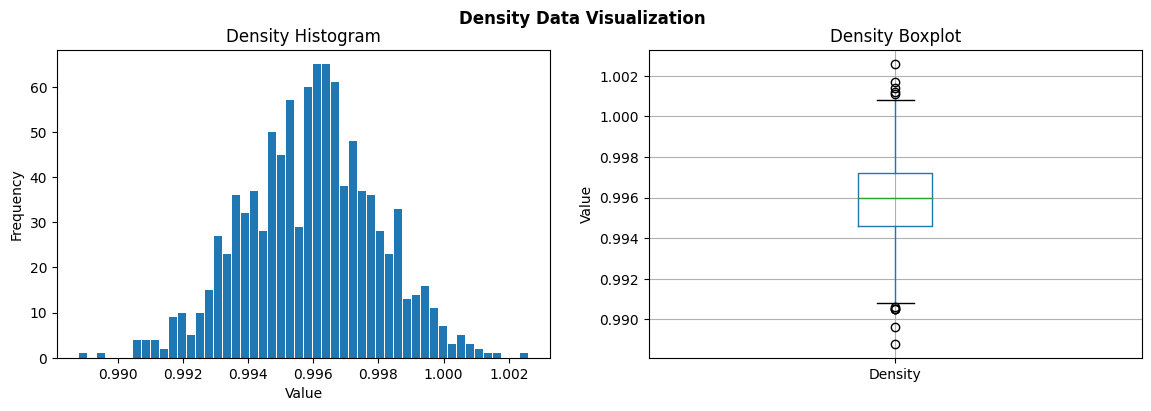

In [144]:
# Visualisasi Kolom Density
vizualizePlot("Density")

#### Bagian 9 : Kolom pH

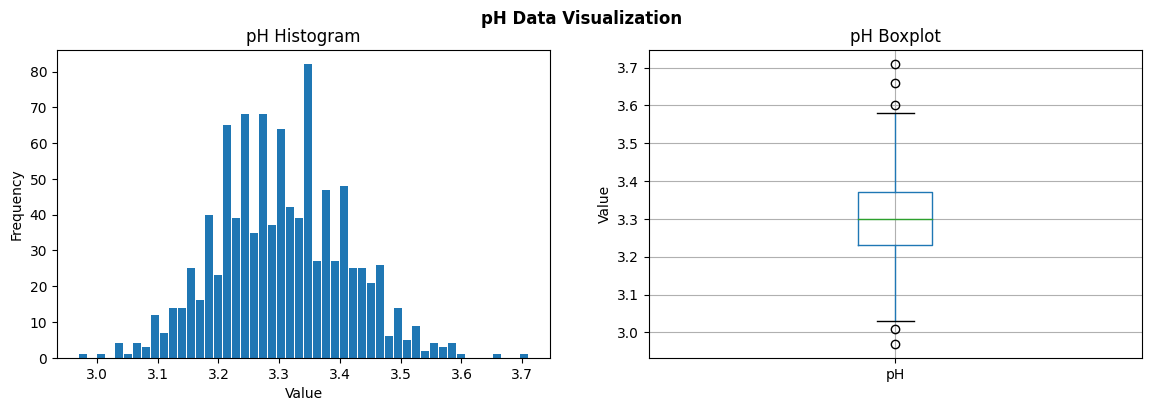

In [145]:
# Visualisasi Kolom pH
vizualizePlot("pH")

#### Bagian 10 : Kolom Sulphates

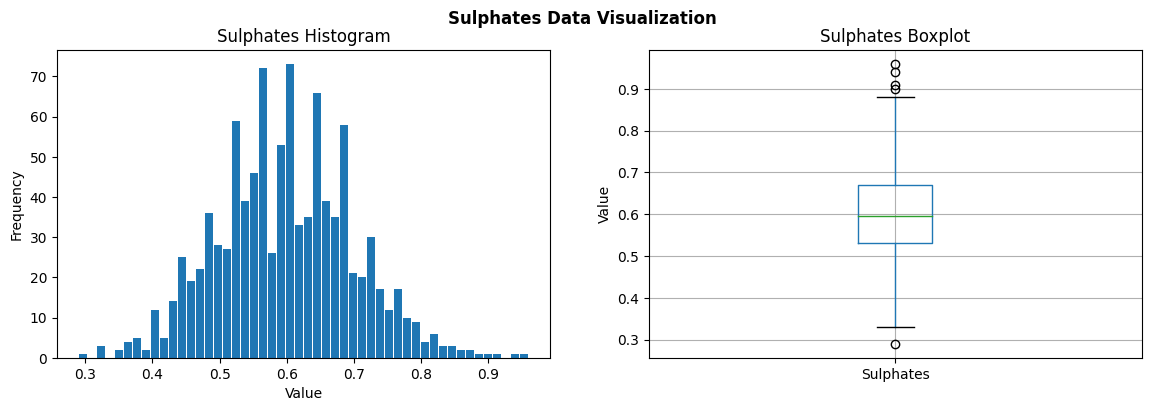

In [147]:
# Visualisasi Kolom Sulphates
vizualizePlot("Sulphates")

#### Bagian 11 : Kolom Alcohol

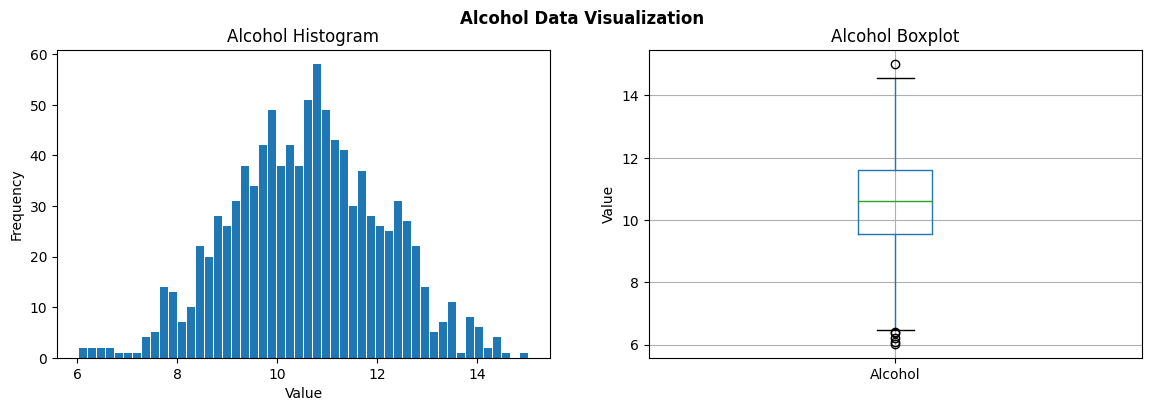

In [148]:
# Visualisasi Kolom Alcohol
vizualizePlot("Alcohol")

#### Bagian 12 : Kolom Quality

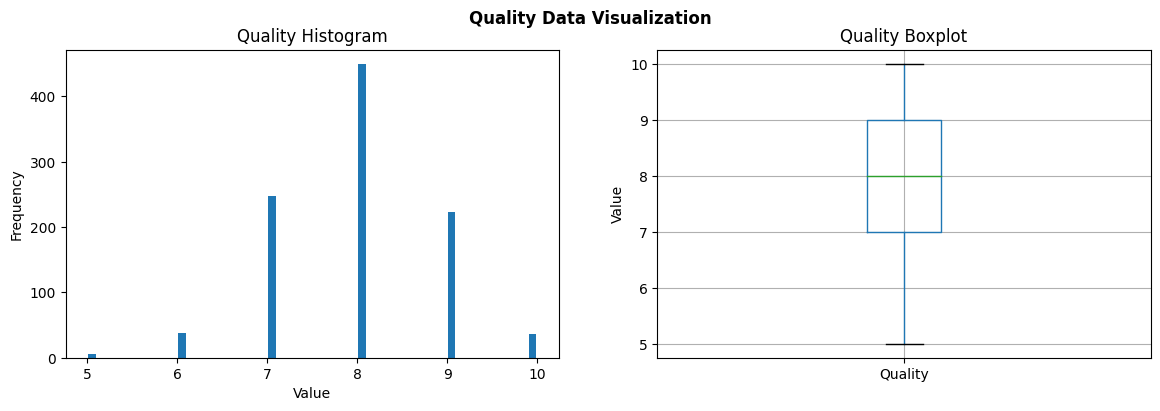

In [150]:
# Visualisasi Kolom Quality
vizualizePlot("Quality")